## NYC Airbnb price Prediction

Business Problem: To enhance the Airbnb experience by accurately predicting NYC property prices, enabling confident decision-making for both hosts and travelers.

Goal: To develop a reliable model for predicting property prices, ensuring fair and competitive pricing strategies for hosts and transparent, trustworthy information for guests.

Primary Objective and Business Benefit: Establishing an effective pricing strategy that promotes customer satisfaction and trust in the Airbnb market, creating a positive environment for hosts and guests.

Project Implications: Contributing to the growth of the Airbnb market and the city's overall appeal, the project aims to cultivate a competitive and transparent marketplace, benefiting both the local economy and the hospitality industry.


#### 1. Read Data
Reading the data using the Sparksession and Github URL for the input file in SPARK. 

In [ ]:
# This will create the sql context to read data and read the data and save it as spark_df
from pyspark.sql import SparkSession
import pandas as pd 

spark = SparkSession \
    .builder \
    .appName("NYC price prediction") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

url = "https://raw.githubusercontent.com/Dharshana03/NYC_Airbnb_price_prediction/main/NYC-Airbnb-2023.csv"
pd_df = pd.read_csv(url)
spark_df = spark.createDataFrame(pd_df)

spark_df.limit(5).show()


<command-449254429941816>:12: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  pd_df = pd.read_csv(url)


+----+--------------------+-------+---------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------------------+-------+
|  id|                name|host_id|host_name|neighbourhood_group|     neighbourhood|latitude|longitude|      room_type|price|minimum_nights|number_of_reviews|last_review|reviews_per_month|calculated_host_listings_count|availability_365|number_of_reviews_ltm|license|
+----+--------------------+-------+---------+-------------------+------------------+--------+---------+---------------+-----+--------------+-----------------+-----------+-----------------+------------------------------+----------------+---------------------+-------+
|2595|Skylit Midtown Ca...|   2845| Jennifer|          Manhattan|           Midtown|40.75356|-73.98559|Entire home/apt|  150|            30|               49| 2022-06-21|              0.3|           


### Short description of the variables
 id: A unique identifier for each listing.

name: The title or name of the listing.

host_id: A unique identifier for each host.

host_name: The name of the host.

neighbourhood_group: The borough in New York City where the listing is located.

neighbourhood: The specific neighborhood within the borough where the listing is situated.

latitude: The latitude coordinate of the listing's location.

longitude: The longitude coordinate of the listing's location.

room_type: The type of room available for rent, such as a private room, shared room, or entire home/apartment.

price: The nightly rental price for the listing.

minimum_nights: The minimum number of nights required for booking the listing.

number_of_reviews: The total number of reviews for the listing.

last_review: The date of the last review for the listing.

reviews_per_month: The average number of reviews per month for the listing.

calculated_host_listings_count: The number of listings by the host.

availability_365: The number of days the listing is available for booking in a year.

number_of_reviews_ltm: The number of reviews in the last twelve months for the listing.

####Datatypes 

In [ ]:
spark_df.dtypes

Out[399]: [('id', 'bigint'),
 ('name', 'string'),
 ('host_id', 'bigint'),
 ('host_name', 'string'),
 ('neighbourhood_group', 'string'),
 ('neighbourhood', 'string'),
 ('latitude', 'double'),
 ('longitude', 'double'),
 ('room_type', 'string'),
 ('price', 'bigint'),
 ('minimum_nights', 'bigint'),
 ('number_of_reviews', 'bigint'),
 ('last_review', 'string'),
 ('reviews_per_month', 'double'),
 ('calculated_host_listings_count', 'bigint'),
 ('availability_365', 'bigint'),
 ('number_of_reviews_ltm', 'bigint'),
 ('license', 'string')]

#### 2. Defining the Target variable

In [ ]:
target = 'price' # dependent variable in our dataset

#### 3. Performing Exploratory data analysis in the dataset

In [ ]:
total_rows = spark_df.count()
total_columns = len(spark_df.columns)

print(f"total no. of rows are {total_rows} and columns are {total_columns}")

total no. of rows are 42931 and columns are 18


####Statistical summary of the dataset and Null percentage of the columns

In [ ]:
#Finding the null percentage for all the variables in the dataset
null_list = [round((spark_df.where(spark_df[x].isNull()).count()/total_rows)*100,2) for x in spark_df.columns] 
null_list.insert(0, 'null_percent') # insert null-count at index 0
print(null_list)


['null_percent', 0.0, 0.03, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.0, 24.0, 0.0, 0.0, 0.0, 100.0]


In [ ]:
summary = spark_df.describe().toPandas() # describes the dataset and displays the result as pandas dataframe (not spark dataframe)
null_list = pd.DataFrame(null_list).T # make null_count a pandas dataframe and transpose it
null_list.columns = summary.columns
summary = summary.append(null_list) # merge it w/ summary dataframe defned above
summary.index = summary.summary
summary = summary[spark_df.columns]
summary

<command-1214778967230850>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(null_list) # merge it w/ summary dataframe defned above


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
summary,,,,,,,,,,,,,,,,,,
count,42931,42919,42931,42926,42931,42931,42931,42931,42931,42931,42931,42931,32627,32627,42931,42931,42931,1
mean,2.22277244526372992E17,1.0,1.516012090219189E8,NaN,None,None,40.7282727775814,-73.94366508294827,None,200.30716731499382,18.111178402552934,25.85600149076425,None,1.1689882612560172,24.05480887936456,140.26221145559154,7.736507418881461,None
stddev,3.3442130220379552E17,None,1.6213010756755662E8,NaN,None,None,0.05764045675759446,0.056626546755180744,None,895.082911473015,27.462512977553033,56.616343792008784,None,1.7896748767542965,80.86795810974908,142.00148630351472,18.290255833789328,None
min,2595,!! Large 3 Bedroom Apartment in NYC!!,1678,Valéria,Bronx,Allerton,40.50031443485432,-74.251907,Entire home/apt,0,1,0,2011-05-12,0.01,1,0,0,41662/AL
max,840466047136140141,🪴🛋🌞 Unique sunny clean brownstone studio 1st f...,503872891,진,Staten Island,Woodside,40.91138,-73.71087,Shared room,99000,1250,1842,2023-03-06,86.61,526,365,1093,41662/AL
null_percent,0.0,0.03,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,24.0,0.0,0.0,0.0,100.0



Dropping the License column as it is nearly 100% null


In [ ]:
spark_df=spark_df.drop('license')


Exploring the price of the properties based on different neighbourhood group and room type

1. The properties in Manhattan are pricier when compared to other neighbourhood

2. Entire home room type is pricier.

3. Less hotel rooms and shared rooms are avaiable in the data. They are of low cost.

In [ ]:
neighborhood_count

,neighbourhood_group,id
0,Bronx,1691
1,Brooklyn,16237
2,Manhattan,17658
3,Queens,6916
4,Staten Island,429


Out[409]: Text(0, 0.5, 'Price')

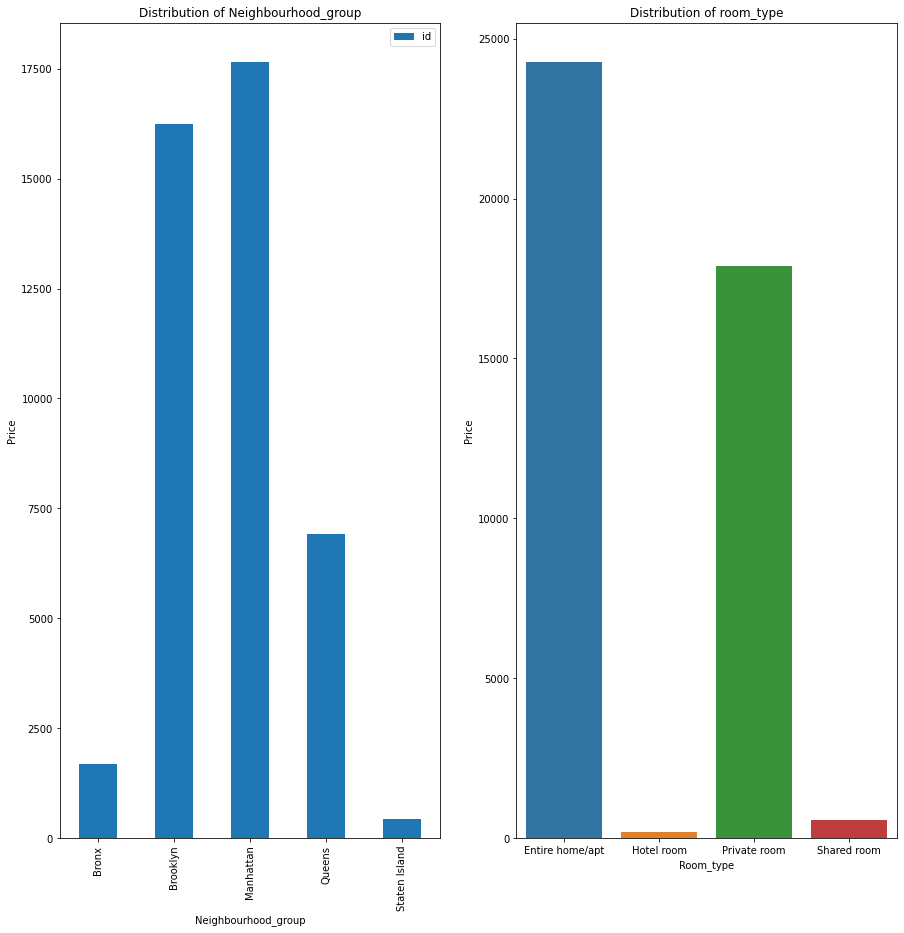

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axes = plt.subplots(1,2, figsize=(15,15))
neighborhood_count = pd_df.groupby("neighbourhood_group").count()["id"].reset_index()
room_type_count = pd_df.groupby("room_type").count()["id"].reset_index()
neighborhood_count.plot(x="neighbourhood_group",kind='bar', ax=axes[0])
sns.barplot(data = room_type_count,x = 'room_type', y = 'id', ax=axes[1]) #, palette = ""

axes[0].set_title('Distribution of Neighbourhood_group')
axes[1].set_title('Distribution of room_type')
axes[0].set_xlabel('Neighbourhood_group')
axes[1].set_xlabel('Room_type')
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')



#### Correlation heatmap

*No of reviews per month and number of reviews in the last twelve month* as they were highly correlated with *number of reviews*. To avoid multicollinearity, columns Review_per_month and number_of_reviews_ltm should be removed


Out[410]: <AxesSubplot:>

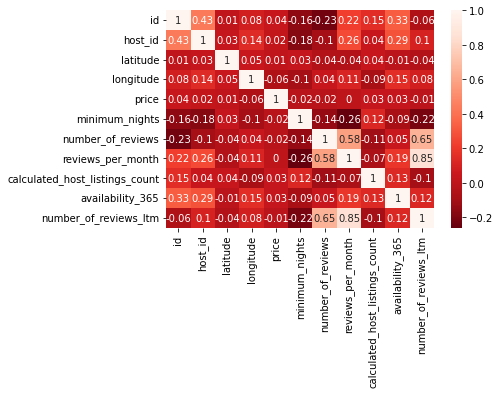

In [ ]:
import seaborn as sns
correlation_matrix = pd_df.corr().round(2)

sns.heatmap(correlation_matrix,  annot=True, cmap = "Reds_r")

### Retaining only the significant columns

name : Name introducing the hosted home
a pretty house with a swimming pool

host_id : id of the host

host_name : Name of the host

neighbourhood_group : The area where the hosted home is located

room_type : Type of hosted house

price : Daily accommodation price (target variable)

minimum_nights : Minimum number of nights to stay

number_of_reviews : Total number of reviews

last_review : Last review date

calculated_host_listings_count: Number of accommodations hosted by the host

availability_365 : Days Available



####Removed columns - 
Id of the property as it is less significant in predicting the price

Latitude, longitude as they provide the same information and we are retaining neighbourhood_group and neighbourhood columns which are sufficient.

No of reviews per month and number of reviews in the last twelve month as they were highly correlated with number of reviews

In [ ]:
use_columns = ['name', 
               'host_id', 
               'neighbourhood_group',
               'neighbourhood', 
               'room_type',
               'price', 
               'minimum_nights', 
               'number_of_reviews',  
               'last_review', 
               'calculated_host_listings_count', 
               'availability_365']

In [ ]:
preprocessed_df = spark_df.select(*use_columns)


#### Checking the Host details who is hosting the most no.of properties
Top two maximum listings are 526 and 394. Ther are listed by hostids - 107434423 and 3223938

In [ ]:
unique_values = spark_df.select('calculated_host_listings_count').distinct().orderBy('calculated_host_listings_count').collect()
unique_values_list = [row['calculated_host_listings_count'] for row in unique_values]

# Print the unique values
print(unique_values_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 38, 39, 41, 44, 47, 48, 51, 53, 54, 57, 59, 62, 63, 69, 76, 83, 88, 101, 107, 113, 120, 124, 131, 159, 178, 192, 207, 222, 356, 394, 526]


In [ ]:
sorted_df = spark_df.groupBy('host_id').count().orderBy('count', ascending=False).limit(10)

# Show the sorted DataFrame
sorted_df.show()


+---------+-----+
|  host_id|count|
+---------+-----+
|107434423|  526|
|  3223938|  394|
|496944100|  356|
|305240193|  222|
| 19303369|  207|
|200239515|  192|
|204704622|  178|
|162280872|  159|
| 51501835|  131|
| 61391963|  124|
+---------+-----+




#### Checking the keywords used by the Hosts in the name of the property
Keywords like pool, gym, elevator, and park is present in the name of the property.

In [ ]:
from pyspark.sql.functions import explode, split

names_1 = spark_df.filter(col('host_id') == 107434423).select('name')
names_2 = spark_df.filter(col('host_id') == 3223938).select('name')


#### Extracting the keywords from the top 200 properties with high reviews

In [ ]:
from pyspark.sql.functions import desc

names_3 = spark_df.select('name').distinct().orderBy(desc('number_of_reviews')).limit(200)

In [ ]:
all_names = names_1.union(names_2).union(names_3)
word_counts = all_names.withColumn('name', explode(split('name', ' '))).groupBy('name').count()

top_words = word_counts.orderBy('count', ascending=False).limit(100)
pd.set_option('display.max_rows', 100)

print(top_words.toPandas())

             name  count
0              w/    530
1              nr    351
2               &    300
3             1BR    236
4            room    193
5           room,    166
6            Gym,    161
7              to    161
8            Park    152
9            HDTV    145
10        Central    123
11       Doorman,    122
12            2BR    108
13        Midtown    101
14            Gym     92
15            min     89
16           W/D,     87
17            New     86
18             in     82
19         Studio     77
20        Doorman     70
21        Village     65
22      Manhattan     63
23           Hill     61
24           w/d,     58
25            UWS     57
26             E.     56
27       Prospect     51
28           gym,     49
29       Bushwick     49
30        Private     48
31            2br     48
32     Manhattan,     48
33            UES     46
34            1br     46
35           Room     45
36      Elevator,     44
37             W.     41
38            Ave     41


In [ ]:
#Remove rows with null names
preprocessed_df = preprocessed_df.na.drop(subset=['name'])


In [ ]:
## Convert all names to lowercase
preprocessed_df = preprocessed_df.withColumn('ext_opt', lower(col('name')))
#Check null 
preprocessed_df.filter(col('ext_opt').isNull()).count()


Out[419]: 0

In [ ]:
#gym, park, elevator,pool,wifi

from pyspark.sql.functions import lit,when

option_lst = ["gym", "pool", "beach", "view", "park", "camping", "skiing", "lake", "new", "surf",'bbq','elevator','wifi']

for item in option_lst:
    preprocessed_df = preprocessed_df.withColumn(item, lit(0))

preprocessed_df.toPandas().head(5)   

,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,...,view,park,camping,skiing,lake,new,surf,bbq,elevator,wifi
0,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,2022-06-21,3,...,0,0,0,0,0,0,0,0,0,0
1,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,2019-12-02,2,...,0,0,0,0,0,0,0,0,0,0
2,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,2017-07-21,1,...,0,0,0,0,0,0,0,0,0,0
3,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,575,2023-02-19,1,...,0,0,0,0,0,0,0,0,0,0
4,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,60,3,2022-08-10,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the UDF function
def get_option_compact(house_name):
    opt = ""
    if "gym" in house_name:
        opt += "gym "
    if "pool" in house_name:
        opt += "pool "
    if "view" in house_name:
        opt += "view "
    if "park" in house_name:
        opt += "park "
    if "skiing" in house_name:
        opt += "skiing "
    if "new" in house_name:
        opt += "new "
    if "bbq" in house_name:
        opt += "bbq "
    if( "lake" in house_name ): 
        opt += "lake "   
    if( "camping" in house_name ): 
        opt += "camping " 
    if( "surf" in house_name ): 
        opt += "surfing "
    if( "beach" in house_name ): 
        opt += "beach "
    if( "elevator" in house_name ): 
        opt += "elevator "
    if( "wifi" in house_name ): 
        opt += "wifi "
    return opt.strip()  # Remove trailing space

# Create a UDF
get_option_compact_udf = udf(get_option_compact, StringType())

# Apply the UDF to the DataFrame
preprocessed_df = preprocessed_df.withColumn('ext_opt_new', get_option_compact_udf(preprocessed_df['ext_opt']))


In [ ]:
from pyspark.sql.functions import split, array_contains, when

for item in option_lst:
    preprocessed_df = preprocessed_df.withColumn(item, when(array_contains(split(preprocessed_df['ext_opt_new'], ' '), item), 1).otherwise(0))



In [ ]:
#Counting the number of options occurred in the names column
preprocessed_df = preprocessed_df.withColumn('ext_opt_cnt', lit(0))

for l in option_lst:
  preprocessed_df = preprocessed_df.withColumn('ext_opt_cnt', when(preprocessed_df['ext_opt'].contains(l), preprocessed_df['ext_opt_cnt'] + 1).otherwise(preprocessed_df['ext_opt_cnt']))


In [ ]:
preprocessed_df.toPandas()


,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,...,camping,skiing,lake,new,surf,bbq,elevator,wifi,ext_opt_new,ext_opt_cnt
0,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,150,30,49,2022-06-21,3,...,0,0,0,0,0,0,0,0,,0
1,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,2019-12-02,2,...,0,0,0,0,0,0,0,0,,0
2,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,2017-07-21,1,...,0,0,0,0,0,0,0,0,,0
3,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,575,2023-02-19,1,...,0,0,0,0,0,0,0,0,,0
4,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,60,3,2022-08-10,1,...,0,0,0,0,0,0,0,0,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42914,bright studio in Williamsburg,28057253,Brooklyn,Williamsburg,Entire home/apt,76,7,0,None,1,...,0,0,0,0,0,0,0,0,,0
42915,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Manhattan,East Village,Private room,32,30,0,None,5,...,0,0,0,0,0,1,0,0,gym bbq,2
42916,Fantastic 3BD apt in Brooklyn,26349246,Brooklyn,Bushwick,Entire home/apt,127,3,0,None,8,...,0,0,0,0,0,0,0,0,,0
42917,The Coziest Home,48533809,Staten Island,Bull's Head,Entire home/apt,280,1,0,None,1,...,0,0,0,0,0,0,0,0,,0


In [ ]:
from pyspark.sql.functions import to_date, year, isnull

preprocessed_df = preprocessed_df.withColumn('last_review_dt', to_date(preprocessed_df['last_review']))
preprocessed_df = preprocessed_df.withColumn('last_review_year', year(preprocessed_df['last_review_dt']))
preprocessed_df.filter(isnull(preprocessed_df['last_review_year'])).toPandas()


,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,...,lake,new,surf,bbq,elevator,wifi,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year
0,Room in the heart of Astoria,67730,Queens,Astoria,Private room,55,30,0,None,1,...,0,0,0,0,0,0,,0,None,NaN
1,Country space in the city,45445,Brooklyn,Flatbush,Private room,150,30,0,None,1,...,0,0,0,0,0,0,,0,None,NaN
2,Room in Beautiful Townhouse.,204586,Bronx,Mott Haven,Private room,60,30,0,None,1,...,0,0,0,0,0,0,,0,None,NaN
3,1 Bedroom in 2 Bdrm Apt- Upper East,236421,Manhattan,Upper East Side,Private room,130,14,0,None,2,...,0,0,0,0,0,0,,0,None,NaN
4,Beautiful Uptown Manhattan apartmnt,253385,Manhattan,Harlem,Private room,200,30,0,None,1,...,0,0,0,0,0,0,,0,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,bright studio in Williamsburg,28057253,Brooklyn,Williamsburg,Entire home/apt,76,7,0,None,1,...,0,0,0,0,0,0,,0,None,NaN
10293,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Manhattan,East Village,Private room,32,30,0,None,5,...,0,0,0,1,0,0,gym bbq,2,None,NaN
10294,Fantastic 3BD apt in Brooklyn,26349246,Brooklyn,Bushwick,Entire home/apt,127,3,0,None,8,...,0,0,0,0,0,0,,0,None,NaN
10295,The Coziest Home,48533809,Staten Island,Bull's Head,Entire home/apt,280,1,0,None,1,...,0,0,0,0,0,0,,0,None,NaN


In [ ]:
#StingIndexer to label code the room_type column

from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol='room_type', outputCol='room_type_le')
preprocessed_df = indexer.fit(preprocessed_df).transform(preprocessed_df)

####Exploring the properties with zero prices


In [ ]:

zero_df = preprocessed_df.filter(preprocessed_df['price'] == 0)
zero_df.toPandas()


,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,...,new,surf,bbq,elevator,wifi,ext_opt_new,ext_opt_cnt,last_review_dt,last_review_year,room_type_le
0,"The Hoxton, Williamsburg - Cosy Room",273324213,Brooklyn,Williamsburg,Hotel room,0,1,83,2023-02-17,1,...,0,0,0,0,0,,0,2023-02-17,2023.0,3.0
1,The James New York - NoMad,268417148,Manhattan,Midtown,Hotel room,0,1,48,2022-10-10,1,...,1,0,0,0,0,new,1,2022-10-10,2022.0,3.0
2,Gardens Suites Hotel by Affinia,269311462,Manhattan,Upper East Side,Hotel room,0,1,5,2022-10-01,1,...,0,0,0,0,0,,0,2022-10-01,2022.0,3.0
3,Mint House At 70 Pine,197053492,Manhattan,Financial District,Hotel room,0,1,619,2023-01-02,1,...,0,0,0,0,0,,0,2023-01-02,2023.0,3.0
4,Leon Hotel LES,265458818,Manhattan,Chinatown,Hotel room,0,1,348,2023-02-13,1,...,0,0,0,0,0,,0,2023-02-13,2023.0,3.0
5,Carvi Hotel NYC,310429455,Manhattan,Midtown,Hotel room,0,30,0,None,1,...,0,0,0,0,0,,0,None,NaN,3.0
6,Hotel Five44,308721299,Manhattan,Hell's Kitchen,Hotel room,0,30,43,2023-02-05,1,...,0,0,0,0,0,,0,2023-02-05,2023.0,3.0
7,Opera House Hotel,309772430,Bronx,Mott Haven,Hotel room,0,30,0,None,1,...,0,0,0,0,0,,0,None,NaN,3.0
8,The Wall Street Inn,314151200,Manhattan,Financial District,Hotel room,0,1,51,2023-02-19,9,...,0,0,0,0,0,,0,2023-02-19,2023.0,3.0
9,Sister City New York,314197504,Manhattan,Lower East Side,Hotel room,0,30,0,None,1,...,1,0,0,0,0,new,1,None,NaN,3.0


In [ ]:

#Checking the availability of the zero priced properties

zero_df.select('availability_365').distinct().show()


+----------------+
|availability_365|
+----------------+
|               0|
+----------------+



In [ ]:
#Removing the properties which are unavailable for booking
preprocessed_df = preprocessed_df.filter(preprocessed_df['price'] > 0)


In [ ]:
preprocessed_df.columns


Out[430]: ['name',
 'host_id',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'calculated_host_listings_count',
 'availability_365',
 'ext_opt',
 'gym',
 'pool',
 'beach',
 'view',
 'park',
 'camping',
 'skiing',
 'lake',
 'new',
 'surf',
 'bbq',
 'elevator',
 'wifi',
 'ext_opt_new',
 'ext_opt_cnt',
 'last_review_dt',
 'last_review_year',
 'room_type_le']

In [ ]:
#Dropping the redundant columns 

drop_column_list = ['last_review','last_review_dt','name', 'ext_opt']
preprocessed_df = preprocessed_df.drop(*drop_column_list)


#### Checking the anomalies in Price column 

In [ ]:
from pyspark.sql import functions as F

top_20_prices = preprocessed_df.orderBy(F.desc("price")).limit(20)
top_20_prices.select('price').show()


+-----+
|price|
+-----+
|99000|
|85170|
|85100|
|65115|
|20500|
|19750|
|15000|
|10000|
|10000|
|10000|
|10000|
|10000|
|10000|
|10000|
|10000|
|10000|
| 9999|
| 9999|
| 9999|
| 9999|
+-----+



In [ ]:
preprocessed_df.toPandas()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,gym,...,lake,new,surf,bbq,elevator,wifi,ext_opt_new,ext_opt_cnt,last_review_year,room_type_le
0,2845,Manhattan,Midtown,Entire home/apt,150,30,49,3,314,0,...,0,0,0,0,0,0,,0,2022.0,0.0
1,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,2,365,0,...,0,0,0,0,0,0,,0,2019.0,1.0
2,7490,Manhattan,Upper West Side,Private room,75,2,118,1,0,0,...,0,0,0,0,0,0,,0,2017.0,1.0
3,8967,Manhattan,Midtown,Private room,68,2,575,1,106,0,...,0,0,0,0,0,0,,0,2023.0,1.0
4,7378,Brooklyn,Sunset Park,Entire home/apt,275,60,3,1,181,0,...,0,0,0,0,0,0,,0,2022.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42887,28057253,Brooklyn,Williamsburg,Entire home/apt,76,7,0,1,8,0,...,0,0,0,0,0,0,,0,NaN,0.0
42888,247439246,Manhattan,East Village,Private room,32,30,0,5,79,1,...,0,0,0,1,0,0,gym bbq,2,NaN,1.0
42889,26349246,Brooklyn,Bushwick,Entire home/apt,127,3,0,8,356,0,...,0,0,0,0,0,0,,0,NaN,0.0
42890,48533809,Staten Island,Bull's Head,Entire home/apt,280,1,0,1,87,0,...,0,0,0,0,0,0,,0,NaN,0.0


In [ ]:
from pyspark.sql.functions import col

def detect_outliers(df, col_name):
    quantiles = df.approxQuantile(col_name, [0.25, 0.75], 0.0)
    Q1 = quantiles[0]
    Q3 = quantiles[1]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"lB:{lower_bound}, uB:{upper_bound}")
    print(df.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound)).count())
    return df.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))

final_train_df = detect_outliers(preprocessed_df, "price")


lB:-112.5, uB:387.5
39599


In [ ]:
def print_null_ratio(df):
    columns = df.columns
    total_count = df.count()

    for c in columns:
        null_count = df.filter(df[c].isNull()).count()
        print(f"{c} : null Ratio {round(null_count / total_count, 4) * 100}%")


In [ ]:
final_train_df = final_train_df.withColumn("last_review_year", when(final_train_df["last_review_year"].isNull(), 0).otherwise(final_train_df["last_review_year"]))


In [ ]:
used_boosting_columns = ['host_id', 'neighbourhood_group',"room_type",
       'price', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365', 'elevator','wifi', 'gym','pool','beach','view','park','camping','skiing','lake','new','surf','bbq', 'ext_opt_cnt','last_review_year']

regression_df = final_train_df.select(*used_boosting_columns)

In [ ]:
print_null_ratio(regression_df)


host_id : null Ratio 0.0%
neighbourhood_group : null Ratio 0.0%
room_type : null Ratio 0.0%
price : null Ratio 0.0%
minimum_nights : null Ratio 0.0%
calculated_host_listings_count : null Ratio 0.0%
availability_365 : null Ratio 0.0%
elevator : null Ratio 0.0%
wifi : null Ratio 0.0%
gym : null Ratio 0.0%
pool : null Ratio 0.0%
beach : null Ratio 0.0%
view : null Ratio 0.0%
park : null Ratio 0.0%
camping : null Ratio 0.0%
skiing : null Ratio 0.0%
lake : null Ratio 0.0%
new : null Ratio 0.0%
surf : null Ratio 0.0%
bbq : null Ratio 0.0%
ext_opt_cnt : null Ratio 0.0%
last_review_year : null Ratio 0.0%


###Storing the categorical and numerical variables in lists for later use

In [ ]:
# identify categorical variables
dtypes = regression_df.dtypes # this will identify the data types of the variables in regression_df
cat_input = [] # create an empty list
for i in range(0, len(regression_df.columns)): #iterate over the variables
  if dtypes[i][1] == 'string': # if dtype is string save it in the cat_input list
    cat_input.append(dtypes[i][0])
cat_input = list(set(cat_input)-set(target))
cat_input

Out[439]: ['room_type', 'neighbourhood_group']

#### 4. Determine Categorical and Numerical Variables


In [ ]:
# numerical variables
num_input = list(set(regression_df.columns) - set([target]) - set(cat_input)) # the difference of the categorical variables from all the variables will give us the numerical variables. 
num_input

Out[440]: ['beach',
 'elevator',
 'park',
 'new',
 'ext_opt_cnt',
 'bbq',
 'calculated_host_listings_count',
 'gym',
 'minimum_nights',
 'wifi',
 'skiing',
 'view',
 'surf',
 'host_id',
 'camping',
 'lake',
 'last_review_year',
 'availability_365',
 'pool']

In [ ]:
columns_to_be_standardized = ["ext_opt_cnt","calculated_host_listings_count","minimum_nights","host_id",'last_review_year','availability_365']

#### 5.Split the data into training and testing sets


In [ ]:
(trainingData, testData) = regression_df.randomSplit([0.8, 0.2], seed=1234)


In [ ]:
trainingData.toPandas()

,host_id,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,elevator,wifi,gym,...,view,park,camping,skiing,lake,new,surf,bbq,ext_opt_cnt,last_review_year
0,2571,Brooklyn,Entire home/apt,99,14,1,35,0,0,0,...,0,0,0,0,0,0,0,0,0,2022
1,2845,Manhattan,Entire home/apt,150,30,3,314,0,0,0,...,0,0,0,0,0,0,0,0,0,2022
2,3647,Queens,Entire home/apt,169,5,1,365,0,0,0,...,0,0,0,0,0,0,0,0,0,2020
3,5089,Brooklyn,Entire home/apt,123,2,1,76,0,0,0,...,0,0,0,0,0,0,0,0,0,2023
4,6041,Queens,Private room,48,30,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,503579221,Manhattan,Entire home/apt,70,30,1,90,0,0,0,...,1,0,0,0,0,0,0,0,1,0
31818,503593397,Brooklyn,Entire home/apt,195,3,1,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31819,503718879,Manhattan,Entire home/apt,199,4,1,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31820,503726515,Brooklyn,Entire home/apt,239,2,1,365,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
print_null_ratio(trainingData)

host_id : null Ratio 0.0%
neighbourhood_group : null Ratio 0.0%
room_type : null Ratio 0.0%
price : null Ratio 0.0%
minimum_nights : null Ratio 0.0%
calculated_host_listings_count : null Ratio 0.0%
availability_365 : null Ratio 0.0%
elevator : null Ratio 0.0%
wifi : null Ratio 0.0%
gym : null Ratio 0.0%
pool : null Ratio 0.0%
beach : null Ratio 0.0%
view : null Ratio 0.0%
park : null Ratio 0.0%
camping : null Ratio 0.0%
skiing : null Ratio 0.0%
lake : null Ratio 0.0%
new : null Ratio 0.0%
surf : null Ratio 0.0%
bbq : null Ratio 0.0%
ext_opt_cnt : null Ratio 0.0%
last_review_year : null Ratio 0.0%


#### 6. Create Custom Standardization

In [ ]:
# normalize a dataset
from pyspark.sql.types import IntegerType
from pyspark import keyword_only  ## < 2.0 -> pyspark.ml.util.keyword_only
from pyspark.ml import Transformer
from pyspark.ml.param.shared import HasInputCol, HasOutputCol, Param
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType


class Standardizer(Transformer, HasInputCol, HasOutputCol): # creating a standardizer class that will standardize columns (x-mean/3std)
  
    def __init__(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
        super(Standardizer, self).__init__() # do not change this part at all when creating custom transformers
        self.setParams(inputCol = inputCol , outputCol = outputCol) # do not change this part at all when creating custom transformers
     
    def setParams(self, inputCol=None, outputCol=None): # do not change this part at all when creating custom transformers
      return self._set(inputCol = inputCol, outputCol = outputCol) # do not change this part at all when creating custom transformers
        

    def _transform(self, dataset): # do not change this part at all when creating custom transformers

      out_col = self.getOutputCol()  # do not change this part at all when creating custom transformers
      in_col = self.getInputCol()  # do not change this part at all when creating custom transformers
      
      from pyspark.sql.functions import stddev, mean, col 
      from pyspark.sql.types import DoubleType
      from pyspark.sql.functions import udf

      mean_ = dataset.select(mean(in_col)).first()[0] # compute mean
      std_ = dataset.select(stddev(in_col)).first()[0] # compute stdev
      udf_c =  udf(lambda x: (x-mean_)/std_, DoubleType()) # create a custom udf that will iteratre over a column and subtract the mean fom each value and divide the result by stdev
      return dataset.withColumn(out_col, udf_c(dataset[in_col])) # standardize the variable and saves the variable as out_col
    

In [ ]:
standardizers = [] # creating an empty list
for column in columns_to_be_standardized: # creating a list of numeric imputers each of which responsible for imputing a variable
  standardizers.append(Standardizer(inputCol = column, outputCol = column))
standardizers

Out[446]: [Standardizer_8eb77b0f7973,
 Standardizer_c38c67c8f3df,
 Standardizer_edf5dde9ca92,
 Standardizer_1790ae64146e,
 Standardizer_c0c4306e9c19,
 Standardizer_e8f4586c4908]

#### 7. Create Dummies (Convert Categorical Variables into 0-1 Dummy Variables)

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StandardScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

indexers = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in cat_input] # this will first create indexers (it means it will number each category in a variable)
for indexer in indexers:
    indexer.setHandleInvalid("keep")
encoders = [OneHotEncoder(inputCol = column+"_index", outputCol = column+"_encoded") for column in cat_input] # This will use the numbers to create the binary variables
encoders

Out[447]: [OneHotEncoder_b99f88c70e1e, OneHotEncoder_128dffa50265]

#### 8. Determine Input Variables (Features)

In [ ]:
input_cols = [] # creates an empty list
for i in cat_input: #iterates over categorical variables
  input_cols.append(i+"_encoded") 

for i in num_input: # iterates over the numerical variables
  input_cols.append(i) 
input_cols

Out[448]: ['room_type_encoded',
 'neighbourhood_group_encoded',
 'beach',
 'elevator',
 'park',
 'new',
 'ext_opt_cnt',
 'bbq',
 'calculated_host_listings_count',
 'gym',
 'minimum_nights',
 'wifi',
 'skiing',
 'view',
 'surf',
 'host_id',
 'camping',
 'lake',
 'last_review_year',
 'availability_365',
 'pool']

#### 9. Add more stages to the Pipeline

In [ ]:
assembler = VectorAssembler(inputCols= input_cols, outputCol="features") # takes the input variables and saves it as a vector
assembler

Out[449]: VectorAssembler_19ea3561ff96

In [ ]:
lr = LinearRegression(featuresCol = 'features', labelCol = target,maxIter=10, regParam=0.3, elasticNetParam=0.8) # this is designed the buiold a regression model using the target variable and the features vector which is a vector contaiing the input_variables (input_cols)



#### 10. Combine the stages as a list for Linear Regression model

In [ ]:
import functools 
import operator
stages = []
stages = functools.reduce(operator.concat, [indexers, encoders, standardizers]) # it will combine the pipeline elements such as numeric imputers, indexers, etc.
stages.append(assembler)
stages.append(lr)
stages

Out[451]: [StringIndexer_3535e5892192,
 StringIndexer_ed02a73f61c8,
 OneHotEncoder_b99f88c70e1e,
 OneHotEncoder_128dffa50265,
 Standardizer_8eb77b0f7973,
 Standardizer_c38c67c8f3df,
 Standardizer_edf5dde9ca92,
 Standardizer_1790ae64146e,
 Standardizer_c0c4306e9c19,
 Standardizer_e8f4586c4908,
 VectorAssembler_19ea3561ff96,
 LinearRegression_9bd08145db04]

In [ ]:
trainingData.columns

Out[452]: ['host_id',
 'neighbourhood_group',
 'room_type',
 'price',
 'minimum_nights',
 'calculated_host_listings_count',
 'availability_365',
 'elevator',
 'wifi',
 'gym',
 'pool',
 'beach',
 'view',
 'park',
 'camping',
 'skiing',
 'lake',
 'new',
 'surf',
 'bbq',
 'ext_opt_cnt',
 'last_review_year']

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Create the pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline on the training data
model = pipeline.fit(trainingData)

# Make predictions on the test data
predictions = model.transform(testData)

# Evaluate the model
#evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
#rmse = evaluator.evaluate(predictions)
predictions.show()



+-------------------+-------------------+---------------+-----+-------------------+------------------------------+--------------------+--------+----+---+----+-----+----+----+-------+------+----+---+----+---+--------------------+-------------------+---------------+-------------------------+-----------------+---------------------------+--------------------+------------------+
|            host_id|neighbourhood_group|      room_type|price|     minimum_nights|calculated_host_listings_count|    availability_365|elevator|wifi|gym|pool|beach|view|park|camping|skiing|lake|new|surf|bbq|         ext_opt_cnt|   last_review_year|room_type_index|neighbourhood_group_index|room_type_encoded|neighbourhood_group_encoded|            features|        prediction|
+-------------------+-------------------+---------------+-----+-------------------+------------------------------+--------------------+--------+----+---+----+-----+----+----+-------+------+----+---+----+---+--------------------+------------------

In [ ]:
evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")


Root Mean Squared Error (RMSE) on test data: 62.74291792207146


In [ ]:
evaluator_r2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared value on test data: {r2}")

R-squared value on test data: 0.3979134190648471


In [ ]:
trainingData.columns

Out[456]: ['host_id',
 'neighbourhood_group',
 'room_type',
 'price',
 'minimum_nights',
 'calculated_host_listings_count',
 'availability_365',
 'elevator',
 'wifi',
 'gym',
 'pool',
 'beach',
 'view',
 'park',
 'camping',
 'skiing',
 'lake',
 'new',
 'surf',
 'bbq',
 'ext_opt_cnt',
 'last_review_year']

### XGBoost Model using Python

In [ ]:
boosting_df = regression_df.toPandas()
xgb_boosting_df = pd.get_dummies(boosting_df)

xgb_boosting_y = xgb_boosting_df['price']
xgb_boosting_x = xgb_boosting_df.drop('price',axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(xgb_boosting_x, xgb_boosting_y, test_size=0.2, random_state=42)


In [ ]:
!pip install xgboost

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e19665cc-43fa-4448-b9ad-a3b4120f8bd5/bin/python -m pip install --upgrade pip' command.


In [ ]:
X_train_xgb.columns

Out[460]: Index(['host_id', 'minimum_nights', 'calculated_host_listings_count',
       'availability_365', 'elevator', 'wifi', 'gym', 'pool', 'beach', 'view',
       'park', 'camping', 'skiing', 'lake', 'new', 'surf', 'bbq',
       'ext_opt_cnt', 'last_review_year', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0)
xgb.fit(X_train_xgb, y_train_xgb)
pred = xgb.predict(X_test_xgb)

print('r2: {0:.5f}'.format(r2_score(y_test_xgb, pred)))

rmse = np.sqrt(mean_squared_error(y_test_xgb, pred))
print("Root Mean Squared Error (RMSE):", rmse)


r2: 0.50882
Root Mean Squared Error (RMSE): 56.47963863686256


### CatBoost Model using Python

In [ ]:
cat_boosting_columns = ['host_id', 'neighbourhood_group', 'room_type', 'neighbourhood',
       'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365','ext_opt_new', 'ext_opt_cnt', 'last_review_year']

cat_boosting_df = final_train_df.select(*cat_boosting_columns).toPandas()

In [ ]:
cat_y = cat_boosting_df['price']
cat_x = cat_boosting_df.drop('price',axis=1)

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split( cat_x, cat_y, test_size=0.2, random_state=42)


In [ ]:
cat_col = []

for c in cat_x.columns:
    if (cat_x[c].dtype== 'object'):
        cat_col.append(c)

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor


You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-e19665cc-43fa-4448-b9ad-a3b4120f8bd5/bin/python -m pip install --upgrade pip' command.


In [ ]:
cat_model = CatBoostRegressor(iterations=1500, learning_rate = 0.15, loss_function='RMSE')

cat_model.fit(X_train_cat,
    y_train_cat,
    cat_features=cat_col,
    eval_set=(X_test_cat, y_test_cat),
    verbose=100,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 75.7824968	test: 75.8218986	best: 75.8218986 (0)	total: 41.7ms	remaining: 1m 2s
100:	learn: 53.2499264	test: 54.6688735	best: 54.6688735 (100)	total: 3.33s	remaining: 46.2s
200:	learn: 51.8132964	test: 53.9455482	best: 53.9455482 (200)	total: 6.65s	remaining: 43s
300:	learn: 50.9583080	test: 53.7184320	best: 53.7184320 (300)	total: 9.76s	remaining: 38.9s
400:	learn: 50.2339076	test: 53.5646142	best: 53.5620345 (391)	total: 13s	remaining: 35.7s
500:	learn: 49.5066068	test: 53.4682803	best: 53.4649118 (498)	total: 16.4s	remaining: 32.6s
600:	learn: 48.8591762	test: 53.3833456	best: 53.3808720 (595)	total: 19.7s	remaining: 29.5s
700:	learn: 48.3057149	test: 53.2734166	best: 53.2706463 (699)	total: 23.1s	remaining: 26.3s
800:	learn: 47.8224499	test: 53.2189348	best: 53.2074644 (786)	total: 26.5s	remaining: 23.1s
900:	learn: 47.3815863	test: 53.2116838	best: 53.2045716 (885)	total: 29.8s	remaining: 19.8s
1000:	learn: 46.9456181	test: 53.2141102	best: 53.1861360 (966)	total: 33.3s	

In [ ]:
y_pred_cat = cat_model.predict(X_test_cat)


In [ ]:

print("R square value of CatBoost model : ",r2_score((y_test_cat), y_pred_cat))


Out[468]: 0.5658211363086691

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred_cat))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 53.10145124552344


R squared value has increased to 53% when catboost regressor is employed. 